## Lead Scoring - Case Study (Logistic Regression model)

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel.


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.
In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.**The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

### Goal

There are quite a few goals for this case study.

* **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**


In [ ]:
# Import libraries
import numpy as np 
import pandas as pd
import warnings # to suppress warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as mpl 
import seaborn as sns

In [ ]:
# Import dataset
leads = pd.read_csv('/content/Leads.csv')
# read the head of the dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Inspection

In [ ]:
# checking dimensions
leads.shape

(9240, 37)

We have 9240 rows and 37 columns in our leads dataset.

In [ ]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From the above description, we can see that there are missing values present in our data. 

In [ ]:
# check count of non-null values and datatypes of the variables
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### All the dataypes of the variables are in correct format.

## Data Cleaning

### 1) Handling 'Select' level present in some of the categorical variables.

A value named 'Select' is present in many columns. It may be because the customer did not select any option from the drop-down menu while the data was being collected, hence it shows 'Select'.
'Select' values are as good as null values. Thus, let's convert these values to null values.

In [ ]:
# Replacing 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [ ]:
# checking the columns for null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
# Finding the percentage null values across columns
leads.isnull().sum()*100/leads.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Some columns have high percentage of missing values. We can drop the columns with percentage missing values greater than 40%. These columns are: How did you hear about X Education, Lead Quality, Lead Profile, Asymmetrique Activity Index , Asymmetrique Activity Score, Asymmetrique Profile Index, Asymmetrique Profile Score. 

In [ ]:
# dropping the columns with % missing values > 40%.
leads = leads.drop(columns=['How did you hear about X Education', 'Lead Quality', 
                            'Lead Profile' , 'Asymmetrique Activity Index' , 
                            'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score'])

In [ ]:
# Finding the null percentages across columns after removing the above columns
leads.isnull().sum()*100/leads.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

#### Handling columns with missing values:
#### 1)  Column: 'City'

This column has 40% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Cities'),
  Text(3, 0, 'Other Cities of Maharashtra'),
  Text(4, 0, 'Other Metro Cities'),
  Text(5, 0, 'Tier II Cities')])

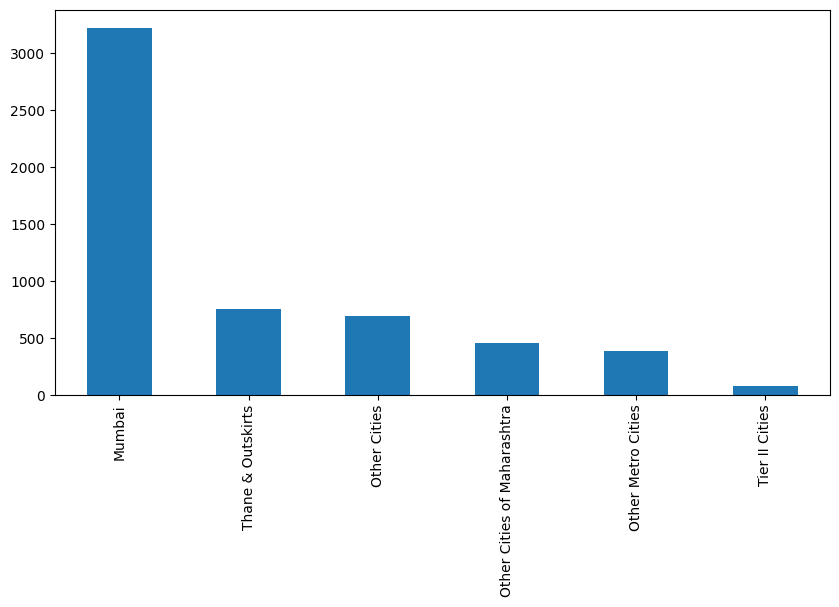

In [ ]:
mpl.figure(figsize=(10,5))
leads['City'].value_counts().plot.bar()
mpl.xticks(rotation=90)

In [ ]:
# Finding the percentage of the different categories of this column:
round(leads['City'].value_counts(normalize=True), 2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

Since most values are 'Mumbai' , we can impute missing values in this column with this value. 

In [ ]:
# Imputing the missing data in the 'City' column with 'Mumbai'
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

#### 2)  Column: 'Specialization'

This column has about 37% missing values

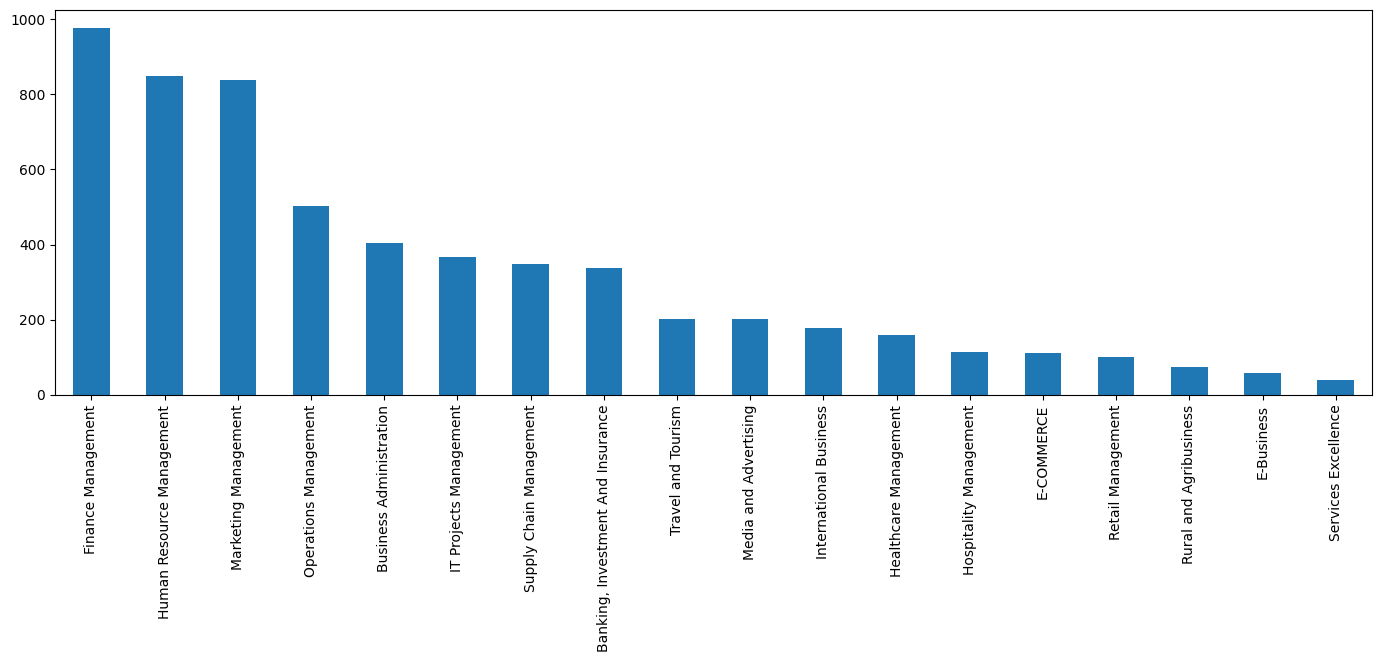

In [ ]:
mpl.figure(figsize=(17,5))
leads['Specialization'].value_counts().plot.bar()
mpl.xticks(rotation=90)
mpl.show()

It is possible that the leads may have left this column blank if they were a student or they didn't have a specialization or maybe their specialization was not there in the options given. To handle this, let's create a separate category called Others.

In [ ]:
# Creating a separate category called 'Others' for this 
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

#### 3) Tags column

'Tags' column has 36% missing values.

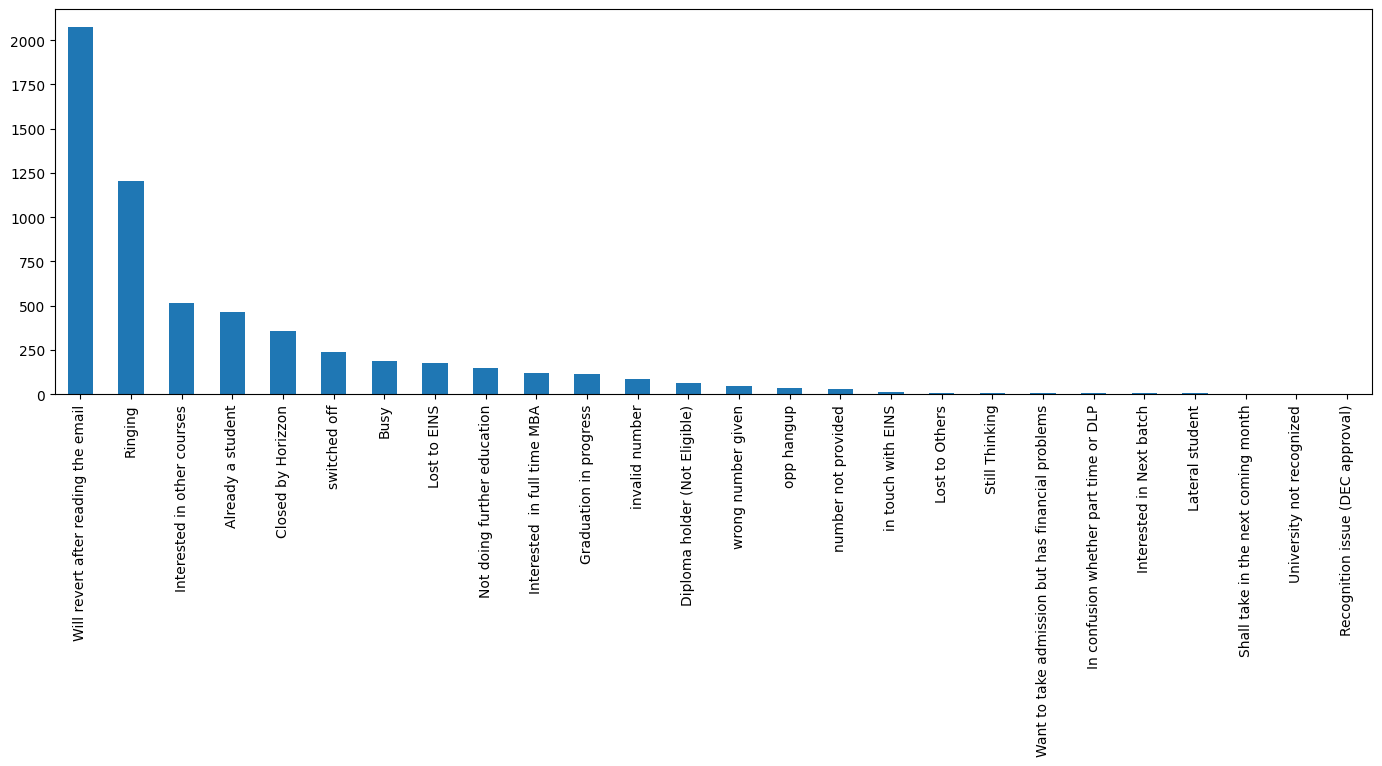

In [ ]:
# Visualizing Tags column
mpl.figure(figsize=(17,5))
leads['Tags'].value_counts().plot.bar()
mpl.xticks(rotation=90)
mpl.show()

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value. 

In [ ]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
leads['Tags'] = leads['Tags'].replace(np.nan,'Will revert after reading the email')

#### 4)  Column: 'What matters most to you in choosing a course'

this column has 29% missing values

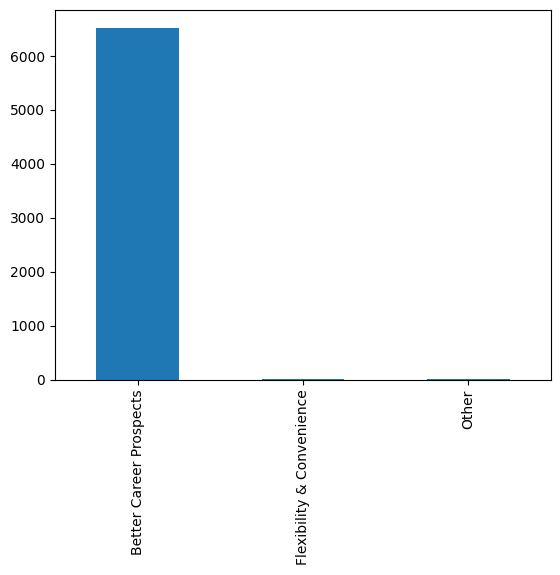

In [ ]:
# Visualizing this column
leads['What matters most to you in choosing a course'].value_counts().plot.bar()
mpl.xticks(rotation=90)
mpl.show()

In [ ]:
# Finding the percentage of the different categories of this column:
round(leads['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can see that this is a highly skewed column, so we can remove this column.

In [ ]:
# Dropping this column 
leads = leads.drop('What matters most to you in choosing a course', axis=1)

In [ ]:
# Finding the null percentages across columns after removing the above columns
leads.isnull().sum()*100/leads.shape[0]

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Country                                     26.634199
Specialization                               0.000000
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

#### 5)  Column: 'What is your current occupation'

this column has 29% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Working Professional'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Housewife'),
  Text(5, 0, 'Businessman')])

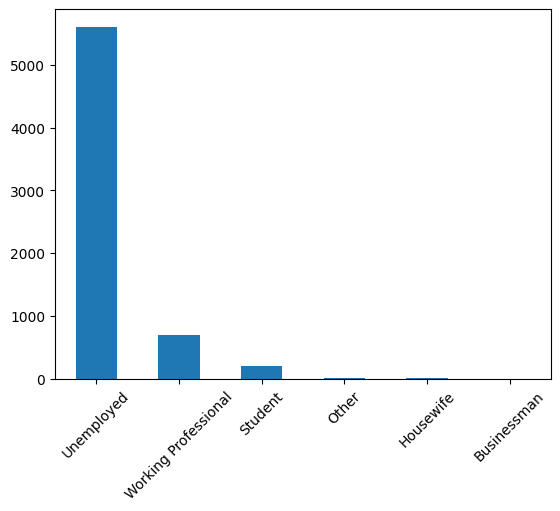

In [ ]:
leads['What is your current occupation'].value_counts().plot.bar()
mpl.xticks(rotation=45)

In [ ]:
# Finding the percentage of the different categories of this column:
round(leads['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Since the  most values are 'Unemployed' , we can impute missing values in this column with this value. 

In [ ]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

#### 6)  Column: 'Country'

This column has 27% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'United Arab Emirates'),
  Text(3, 0, 'Singapore'),
  Text(4, 0, 'Saudi Arabia'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Hong Kong'),
  Text(9, 0, 'Bahrain'),
  Text(10, 0, 'Oman'),
  Text(11, 0, 'France'),
  Text(12, 0, 'unknown'),
  Text(13, 0, 'South Africa'),
  Text(14, 0, 'Nigeria'),
  Text(15, 0, 'Germany'),
  Text(16, 0, 'Kuwait'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'China'),
  Text(20, 0, 'Asia/Pacific Region'),
  Text(21, 0, 'Uganda'),
  Text(22, 0, 'Bangladesh'),
  Text(23, 0, 'Italy'),
  Text(24, 0, 'Belgium'),
  Text(25, 0, 'Netherlands'),
  Text(26, 0, 'Ghana'),
  Text(27, 0, 'Philippines'),
  Text(28, 0, 'Russia'),
  Text(29, 0, 'Switzerland'),
  

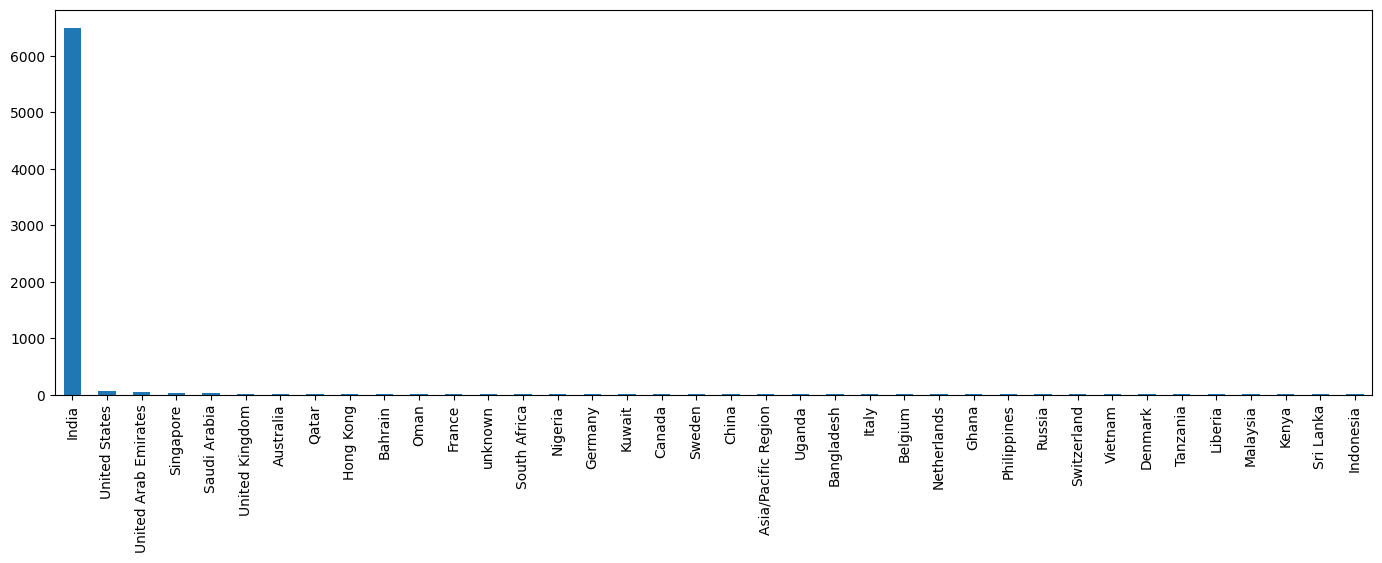

In [ ]:
mpl.figure(figsize=(17,5))
leads['Country'].value_counts().plot.bar()
mpl.xticks(rotation=90)

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [ ]:
# Imputing the missing data in the 'Country' column with 'India'
leads['Country'] = leads['Country'].replace(np.nan,'India')

In [ ]:
# Finding the null percentages across columns now
leads.isnull().sum()*100/leads.shape[0]

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Country                                     0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

#### Rest missing values are under 2% so we can drop these rows.


In [ ]:
# Dropping the rows with null values
leads.dropna(inplace = True)

In [ ]:
# Finding the null percentages across columns now
leads.isnull().sum()*100/leads.shape[0]

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset. 
### We can find the percentage of rows retained.

In [ ]:
# Percentage of rows retained 
(len(leads.index)/9240)*100

98.2034632034632

#### We have retained 98% of the rows after cleaning the data . 

In [ ]:
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Country', 'Specialization' , 
            'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Update me on Supply Chain Content', 'Tags','City', 
            'Get updates on DM Content', 'Last Notable Activity', 
            'A free copy of Mastering The Interview', 'I agree to pay the amount through cheque', 'What is your current occupation']

In [ ]:
# Checking unique values present in categorical columns

for column in leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Country', 'Specialization', 
            'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Update me on Supply Chain Content', 'Tags','City', 
            'Get updates on DM Content', 'Last Notable Activity', 
            'A free copy of Mastering The Interview', 'I agree to pay the amount through cheque', 'What is your current occupation']]:
    
    # Select column contents by column  
    # name using [] operator
    columnSeriesObj = leads[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.unique())

Column Name :  Lead Origin
Column Contents :  ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
Column Name :  Lead Source
Column Contents :  ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Column Name :  Do Not Email
Column Contents :  ['No' 'Yes']
Column Name :  Do Not Call
Column Contents :  ['No' 'Yes']
Column Name :  Converted
Column Contents :  [0 1]
Column Name :  Last Activity
Column Contents :  ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' 'SMS Sent'
 'Visited Booth in Tradeshow' 'Approached upfront'
 'Resubscribed to emails' 'Email Rece

Columns Magazine, Update me on Supply Chain Content, I agree to pay the amount through cheque, Get updates on DM Content have only one value - No.
Since these are skewed columns, we can get rid of them

In [ ]:
# Dropping the above mentioned columns
leads = leads.drop(['Magazine','Update me on Supply Chain Content', 'I agree to pay the amount through cheque', 'Get updates on DM Content'], axis = 1)

# Exploratory Data Anaysis

In [ ]:
#Checking shape of dataframe
leads.shape

(9074, 25)

In [ ]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

With 9074 rows and 25 columns, we proceed to do EDA.

### Checking for duplicates:

In [ ]:
leads[leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,City,A free copy of Mastering The Interview,Last Notable Activity


We see there are no duplicate records in our lead dataset.

## Univariate Analysis and Bivariate Analysis

### 1) Converted 
#### Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [ ]:
# check % of conversion
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

### 2) Lead Origin

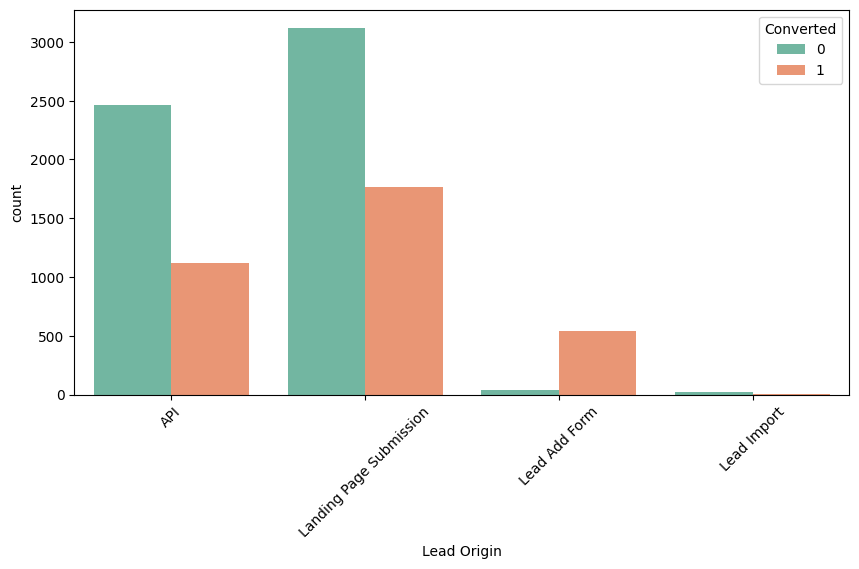

In [ ]:
mpl.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 45)
mpl.show()

### Inference :
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.

**To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**

### 3) Lead Source

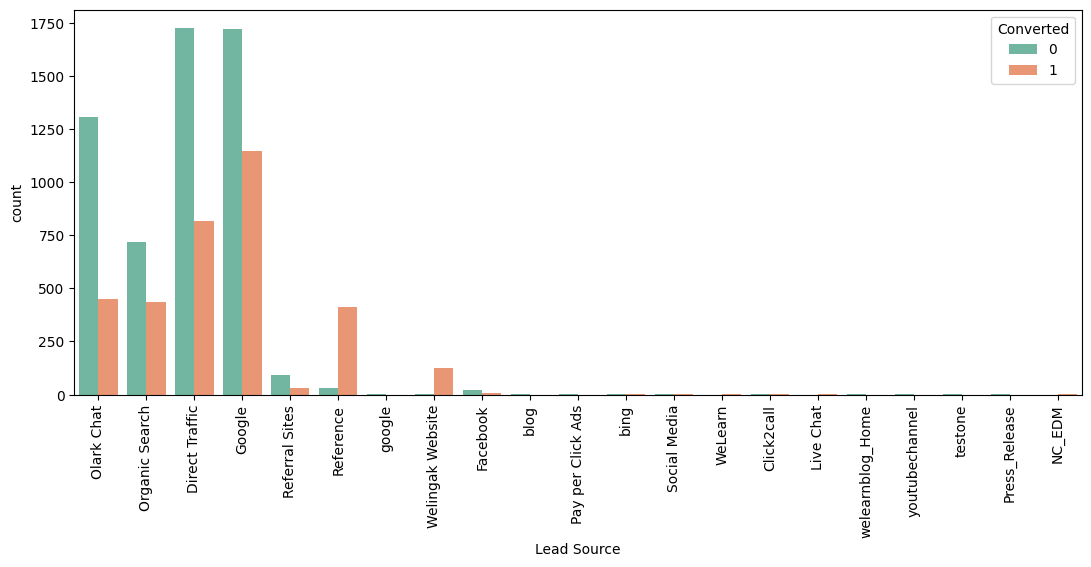

In [ ]:
mpl.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

We see that there are two categories - Google and google. Let's combine them.

In [ ]:
# Need to replace 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [ ]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads['Lead Source'] = leads['Lead Source'].replace([ 'blog', 'Pay per Click Ads', 'bing', 
                                                             'Social Media', 'WeLearn','Click2call', 'Live Chat', 
                                                             'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Others')


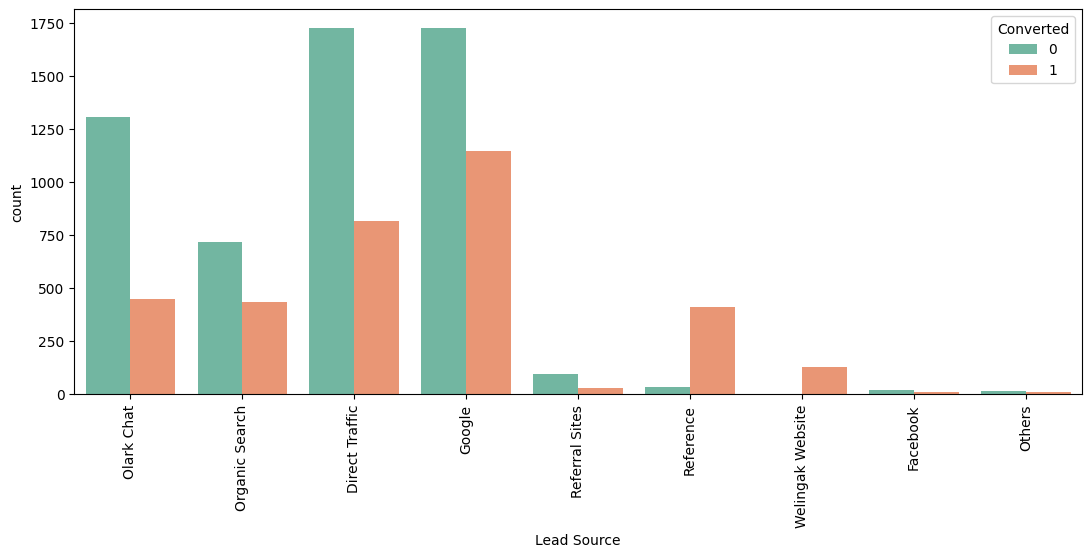

In [ ]:
# Visualizing again
mpl.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

**To improve overall lead conversion rate, we recommend focusing on improving converion of leads generated via olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.**

### 4) Do not Email 

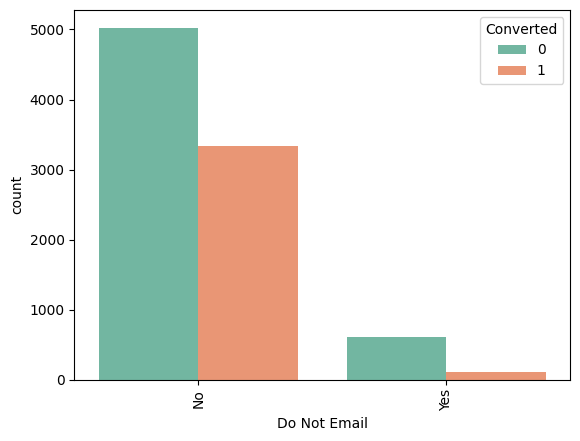

In [ ]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads,palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
Most entries are 'No'. Since there is a clear imbalance in data, no useful inference can be drawn from this parameter.

### 5) Do not call

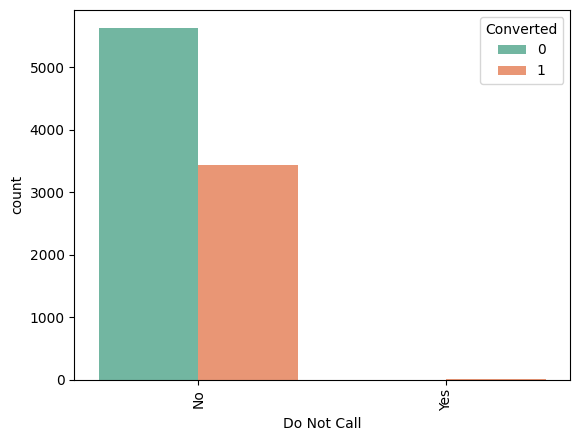

In [ ]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
Most entries are 'No'. Since there is a clear imbalance in data, no useful inference can be drawn from this parameter.

### 6) TotalVisits

In [ ]:
# TotalVisits is a numerical variable
# Checking the percentiles
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

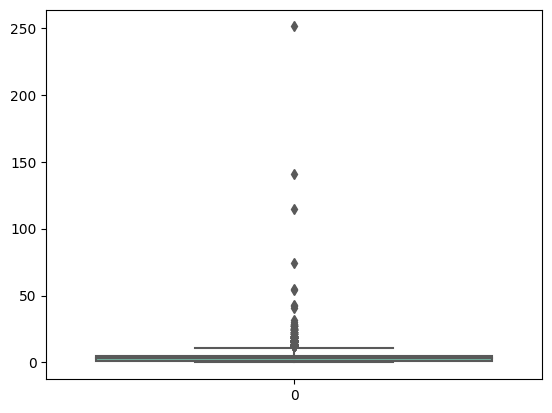

In [ ]:
# Visualising TotalVisits using a boxplot
sns.boxplot(leads['TotalVisits'], orient='vert', palette='Set2')

**As seen above, there are a number of outliers in the data. To handle this, let's cap the data to 95% values for analysis.**

In [ ]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

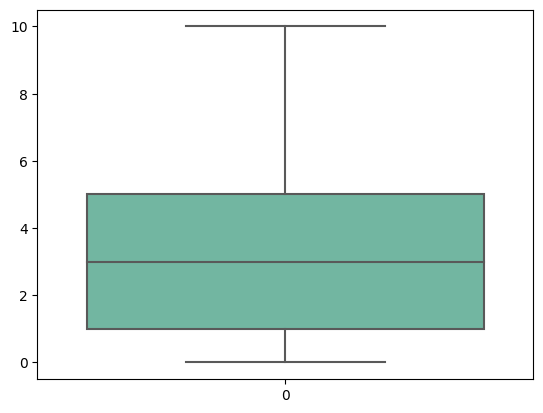

In [ ]:
# Visualizing again
sns.boxplot(leads['TotalVisits'], orient='vert',palette='Set2')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

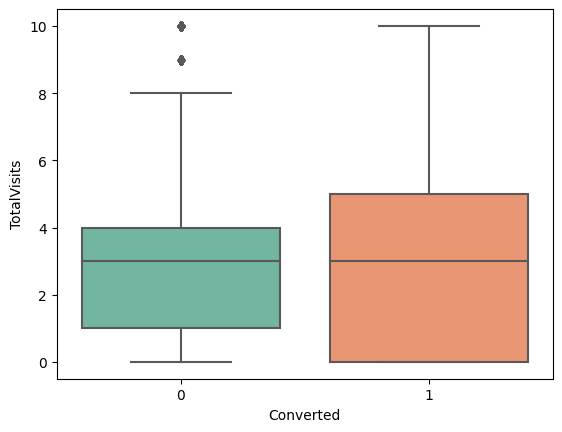

In [ ]:
# Visualising TotalVisits with converted as x
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads, palette='Set2')

### Inference
* Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

### 7) Total Time Spent on Website

In [ ]:
# Describing the numerical column with stat values
leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

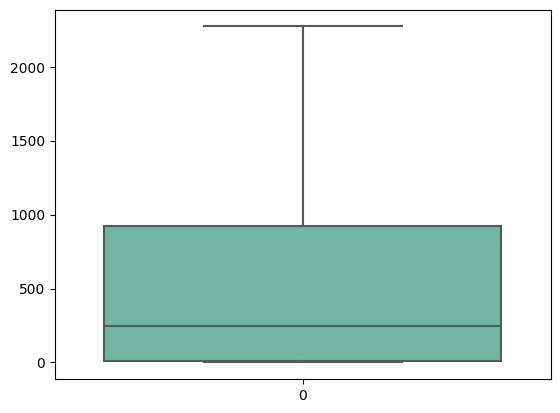

In [ ]:
# Visualising the column using boxplot
sns.boxplot(leads['Total Time Spent on Website'], orient='vert', palette='Set2')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

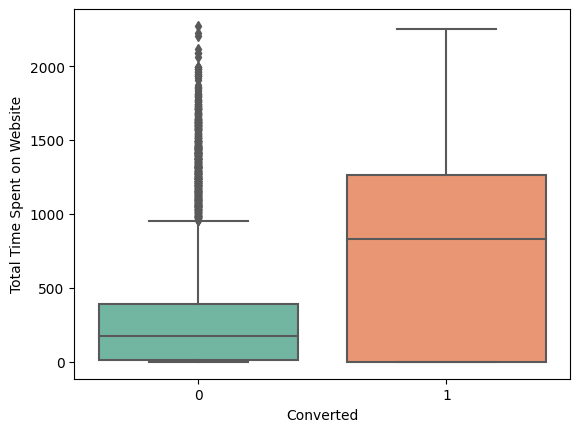

In [ ]:
# Visualising Total Time Spent on Website with converted as x
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads, palette='Set2')

### Inference
* Leads spending more time on the website are more likely to be converted.

**Recommendation: The website should be more engaging and attractive to see easier lead conversion.**

### 8) Page Views Per Visit

In [ ]:
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

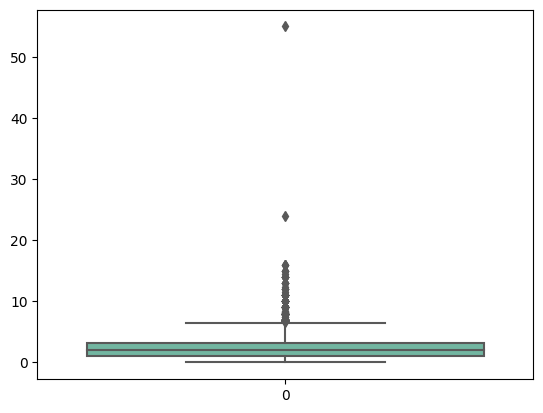

In [ ]:
# Visualising the column using a boxplot
sns.boxplot(leads['Page Views Per Visit'], orient='vert', palette='Set2')

**As seen above, there are a number of outliers in the data. To handle this, let's cap the data to 95% values for analysis like we did earlier.**

In [ ]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

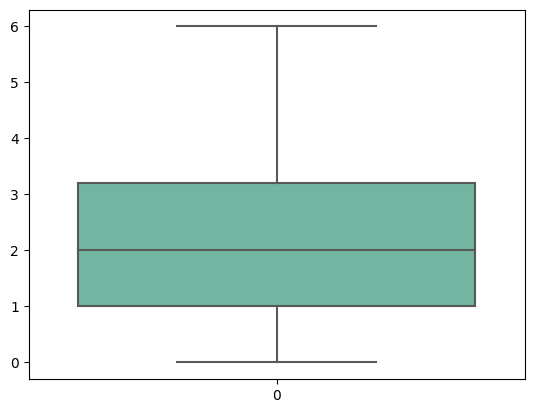

In [ ]:
# Visualizing again
sns.boxplot(leads['Page Views Per Visit'], palette ='Set2', orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

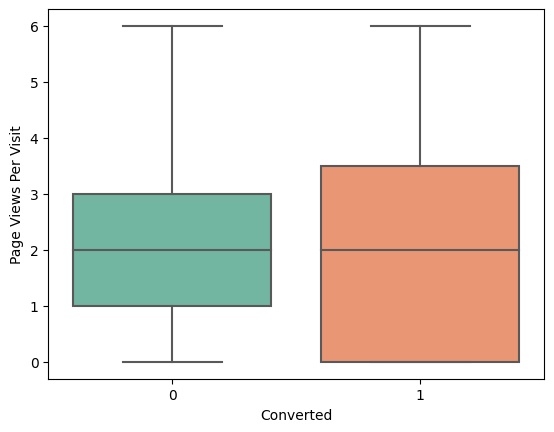

In [ ]:
# Visualsing the column with converted as x
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads, palette='Set2')

### Inference
* Median for converted and unconverted leads is the same.

**Nothing significant can be inferred at this point about lead conversion from Page Views Per Visit column.**

### 9) Last Activity

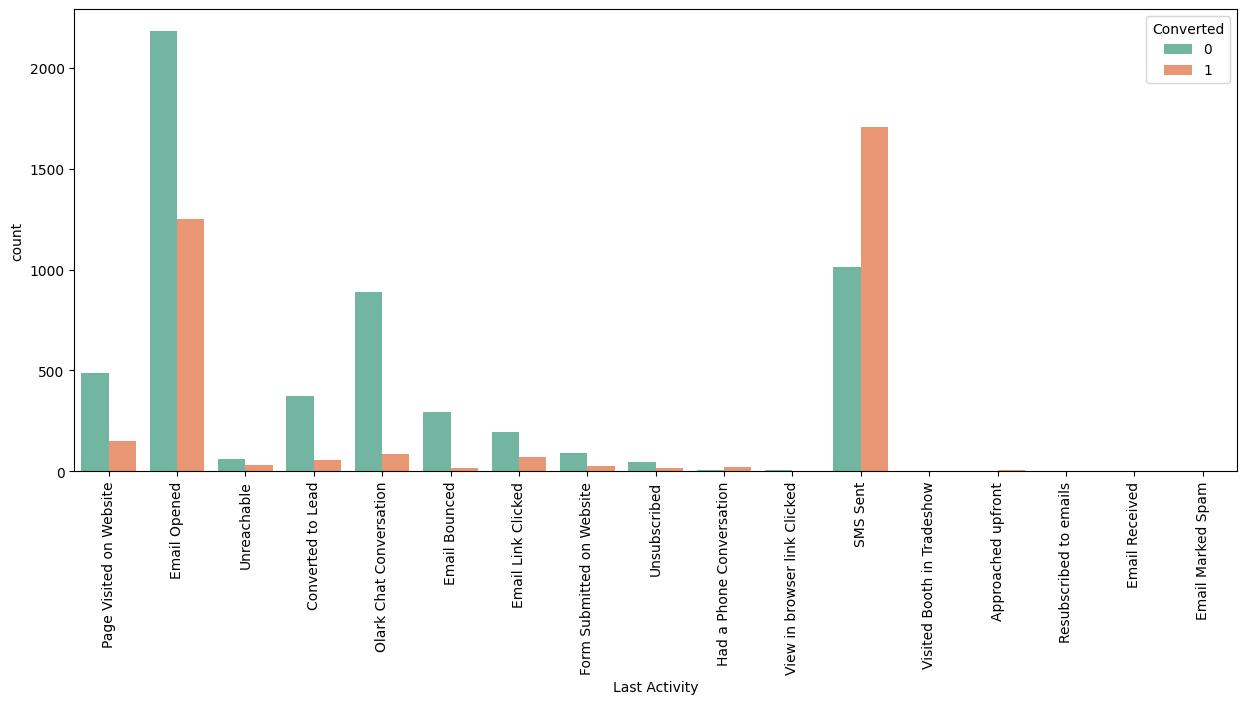

In [ ]:
# Last activity is a categorical column, let's look at the categories using a bar plot
mpl.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

In [ ]:
# We can combine the last activities with very less data, to a col named "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

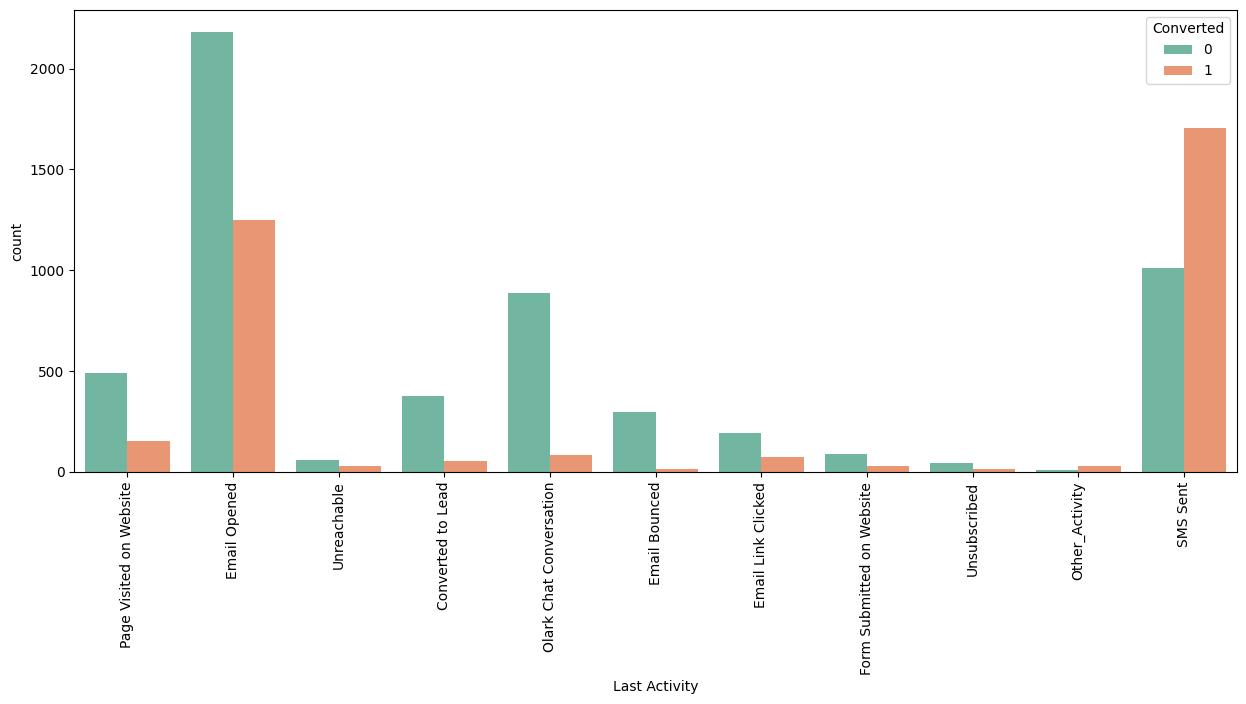

In [ ]:
# Visualizing again
mpl.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
1. Most of the leads have Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is the highest.

### 10) Country

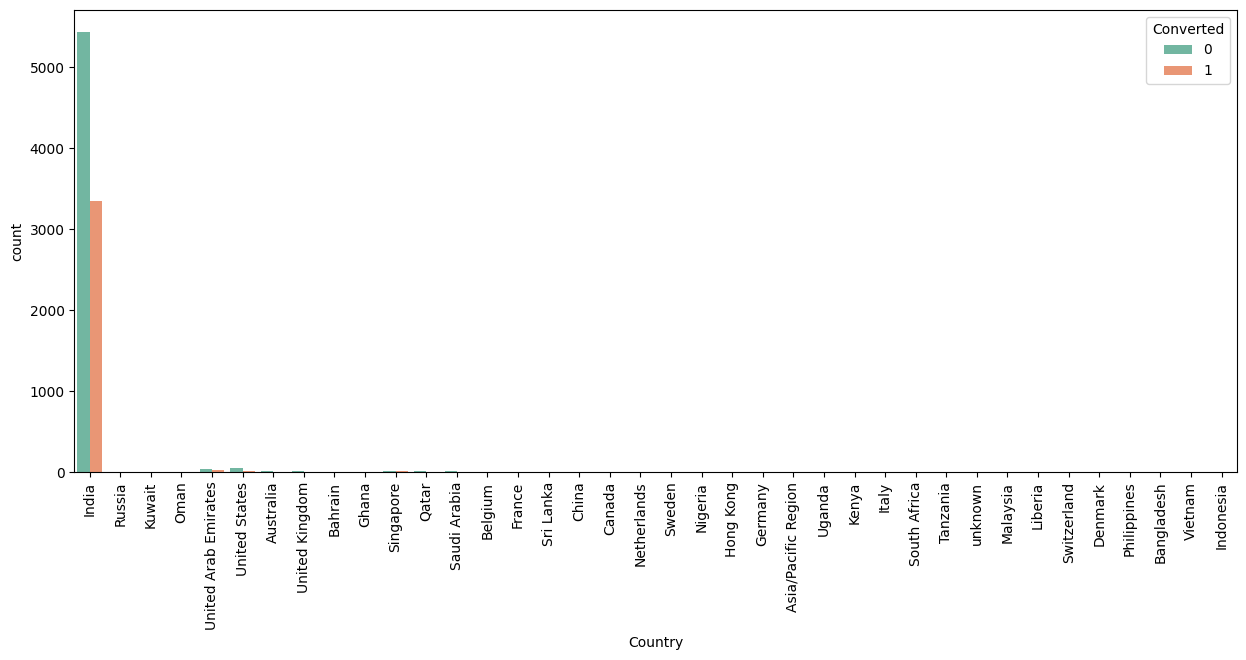

In [ ]:
mpl.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
**Data is very skewed. Most values are 'India'. Thus, no significant inferences can be drawn at present.**

In [ ]:
# Finding the percentage of the different categories of this column
leads['Country'].value_counts(normalize=True)*100

India                   96.837117
United States            0.760414
United Arab Emirates     0.584086
Singapore                0.264492
Saudi Arabia             0.231430
United Kingdom           0.165307
Australia                0.143266
Qatar                    0.110205
Hong Kong                0.077143
Bahrain                  0.077143
Oman                     0.066123
France                   0.066123
unknown                  0.055102
South Africa             0.044082
Nigeria                  0.044082
Germany                  0.044082
Kuwait                   0.044082
Canada                   0.044082
Sweden                   0.033061
China                    0.022041
Asia/Pacific Region      0.022041
Uganda                   0.022041
Bangladesh               0.022041
Italy                    0.022041
Belgium                  0.022041
Netherlands              0.022041
Ghana                    0.022041
Philippines              0.022041
Russia                   0.011020
Switzerland   

In [ ]:
# We can drop this column as >96% of the value is India and thus gives no signifincant information
leads = leads.drop(['Country'], axis =1)

### 11) Specialization

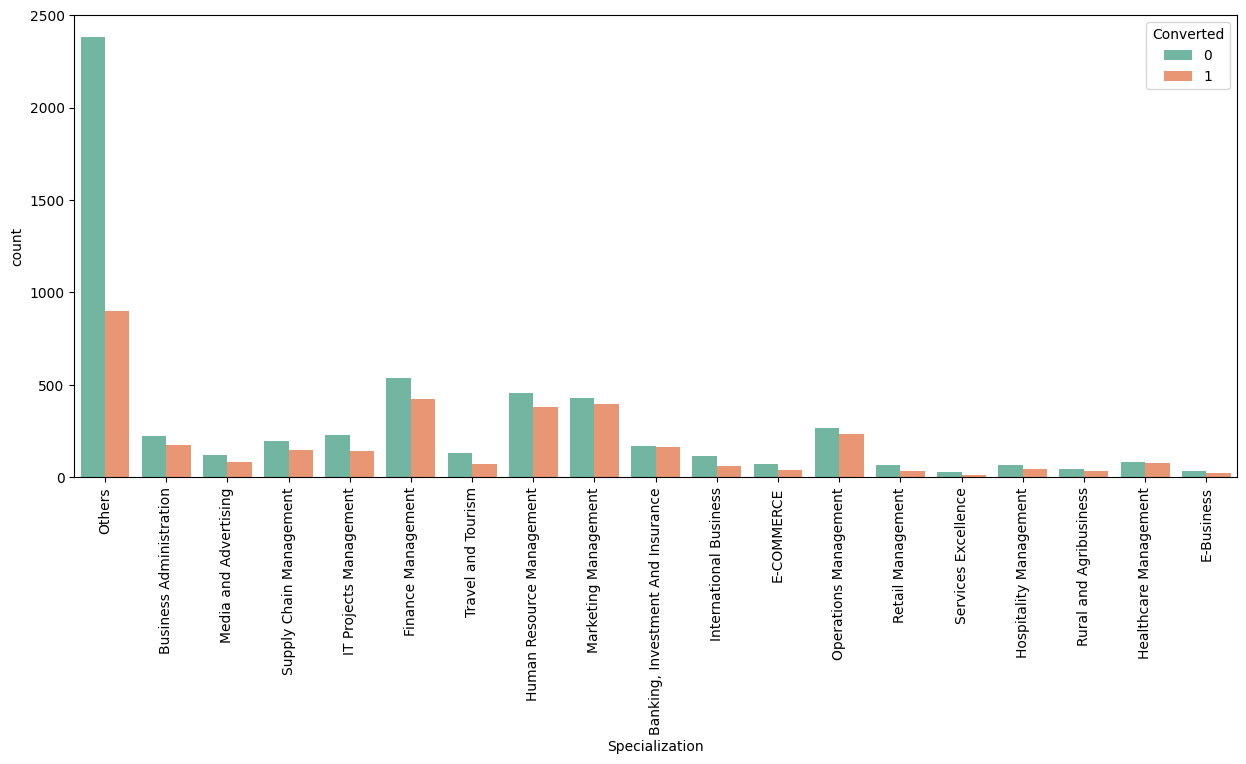

In [ ]:
mpl.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
**The highest number of leads fall under Others in Specialisation. Focus should be more on these leads and also on generating leads with high conversion rate like with Specialisation - Banking, Investment and Insurance, Human Resource Management, Finance Management, Marketing Management.**

### 12) What is your current occupation

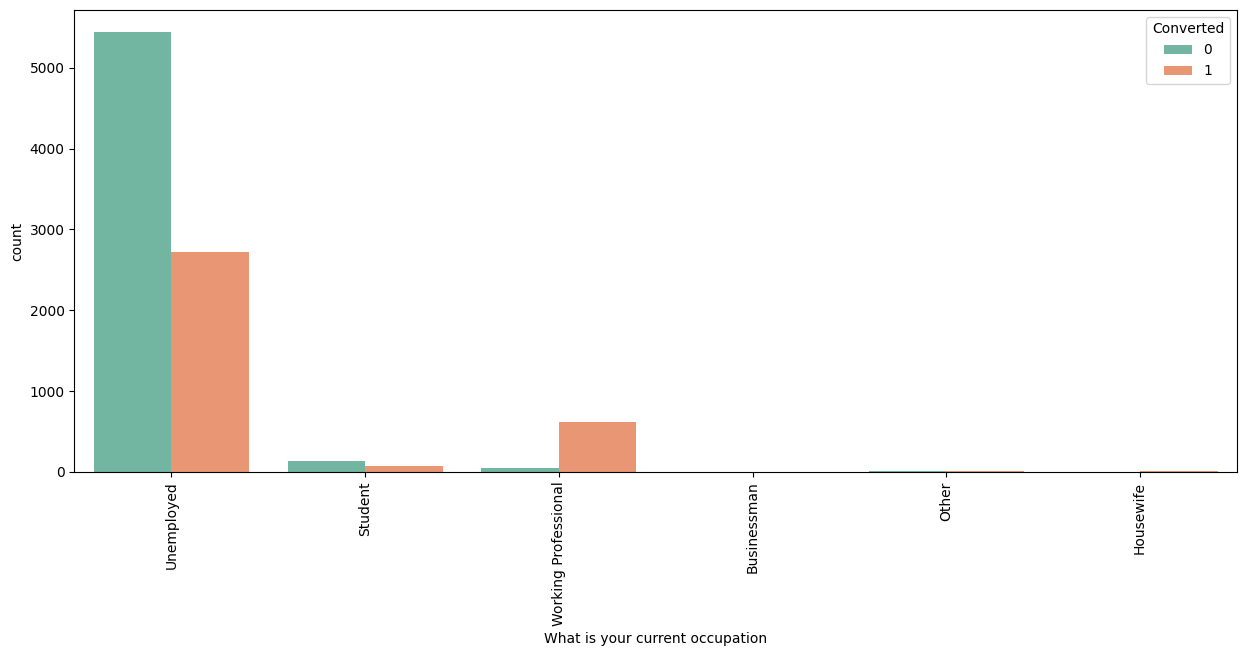

In [ ]:
mpl.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
1. Working Professionals opting for the courses have high chances of joining it.
2. Unemployed leads are the most in number, but with a mere 30-35% conversion rate.

### 13) Search

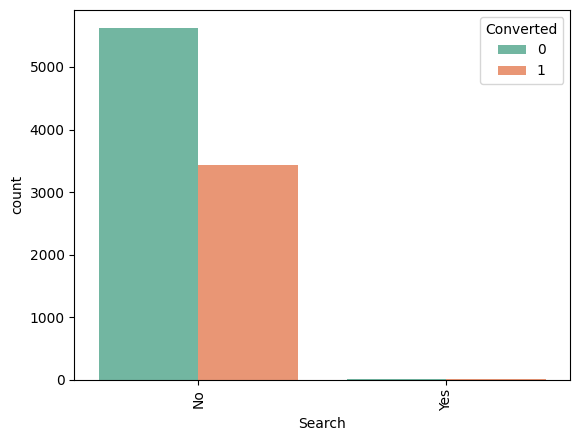

In [ ]:
# Search is a categorical variable
sns.countplot(x = "Search", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
Most entries are 'No'. Since there is a clear imbalance in data, no useful inference can be drawn from this parameter.

In [ ]:
# Finding the percentage of the different categories of this column
leads['Search'].value_counts(normalize=True)*100

No     99.845713
Yes     0.154287
Name: Search, dtype: float64

In [ ]:
# We can drop this column as >99% of the value is No and thus gives no signifincant information
leads = leads.drop(['Search'], axis =1)

### 14) Newspaper Article

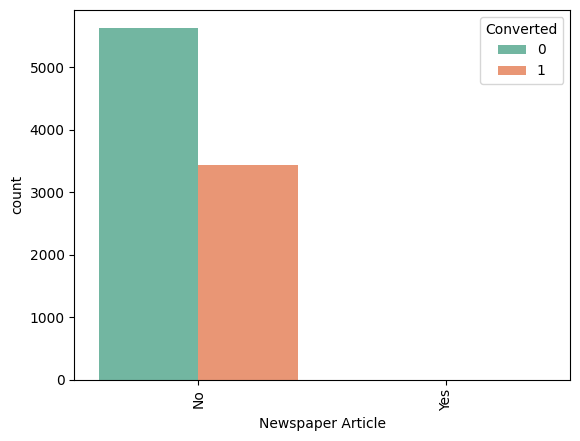

In [ ]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
Most entries are 'No'. Since there is a clear imbalance in data, no useful inference can be drawn from this parameter.

In [ ]:
# Finding the percentage of the different categories of this column
leads['Newspaper Article'].value_counts(normalize=True)*100

No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64

In [ ]:
# We can drop this column as >99% of the value is No and thus gives no signifincant information
leads = leads.drop(['Newspaper Article'], axis =1)

### 15) X Education Forums

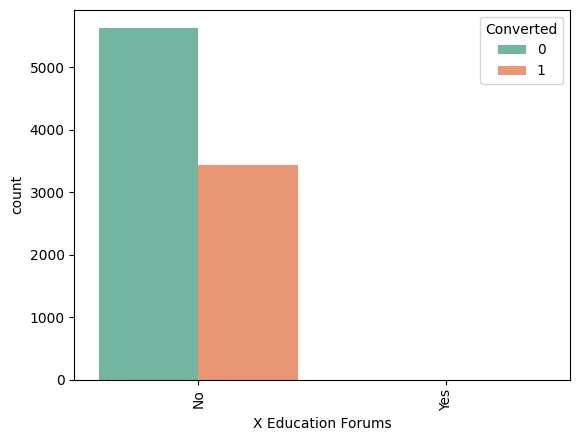

In [ ]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
Most entries are 'No'. Since there is a clear imbalance in data, no useful inference can be drawn from this parameter.

In [ ]:
# Finding the percentage of the different categories of this column
leads['X Education Forums'].value_counts(normalize=True)*100

No     99.98898
Yes     0.01102
Name: X Education Forums, dtype: float64

In [ ]:
# We can drop this column as >99% of the value is No and thus gives no signifincant information
leads = leads.drop(['X Education Forums'], axis =1)

### 16) Newspaper

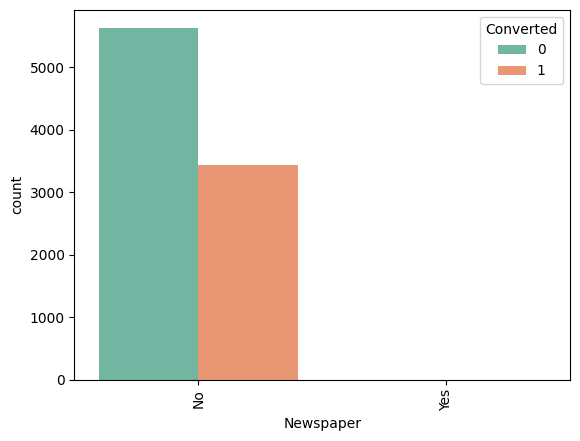

In [ ]:
sns.countplot(x = "Newspaper", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
Most entries are 'No'.Since there is a clear imbalance in data, no useful inference can be drawn from this parameter.

In [ ]:
# Finding the percentage of the different categories of this column
leads['Newspaper'].value_counts(normalize=True)*100

No     99.98898
Yes     0.01102
Name: Newspaper, dtype: float64

In [ ]:
#We can drop this column as >99% of the value is No and thus gives no signifincant information
leads = leads.drop(['Newspaper'], axis =1)

### 17) Digital Advertisement

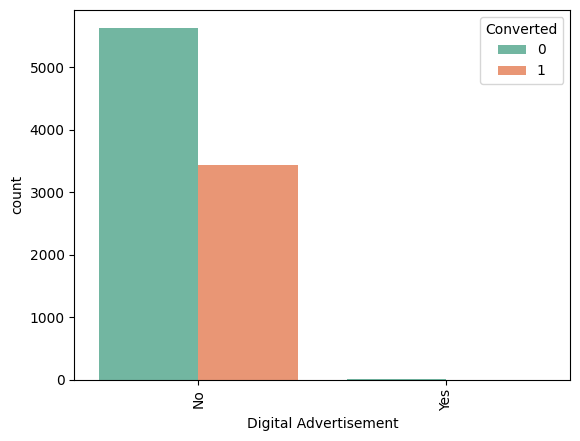

In [ ]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
Most entries are 'No'. Since there is a clear imbalance in data, no useful inference can be drawn from this parameter.

In [ ]:
# Finding the percentage of the different categories of this column
leads['Digital Advertisement'].value_counts(normalize=True)*100

No     99.955918
Yes     0.044082
Name: Digital Advertisement, dtype: float64

In [ ]:
# We can drop this column as >99% of the value is No and thus gives no signifincant information
leads = leads.drop(['Digital Advertisement'], axis =1)

### 18) Through Recommendations

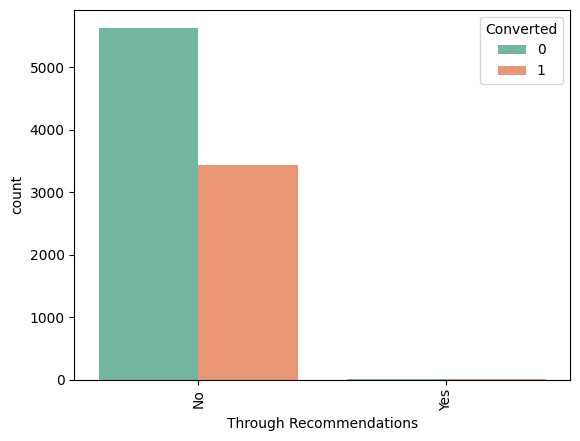

In [ ]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
Most entries are 'No'. Since there is a clear imbalance in data, no useful inference can be drawn from this parameter.

In [ ]:
# Finding the percentage of the different categories of this column
leads['Through Recommendations'].value_counts(normalize=True)*100

No     99.922857
Yes     0.077143
Name: Through Recommendations, dtype: float64

In [ ]:
# We can drop this column as >99% of the value is No and thus gives no signifincant information
leads = leads.drop(['Through Recommendations'], axis =1)

### 19) Receive More Updates About Our Courses

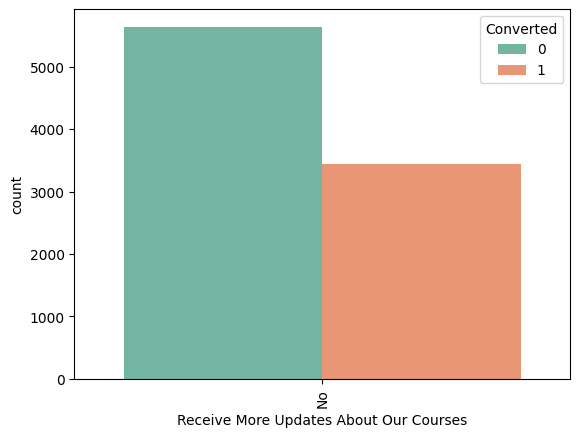

In [ ]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
All entries are 'No'. No Inference can be drawn with this parameter.

In [ ]:
# Finding the percentage of the different categories of this column
leads['Receive More Updates About Our Courses'].value_counts(normalize=True)*100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [ ]:
# We can drop this column there is only one value: No and thus gives no signifincant information
leads = leads.drop(['Receive More Updates About Our Courses'], axis =1)

### 21) Tags

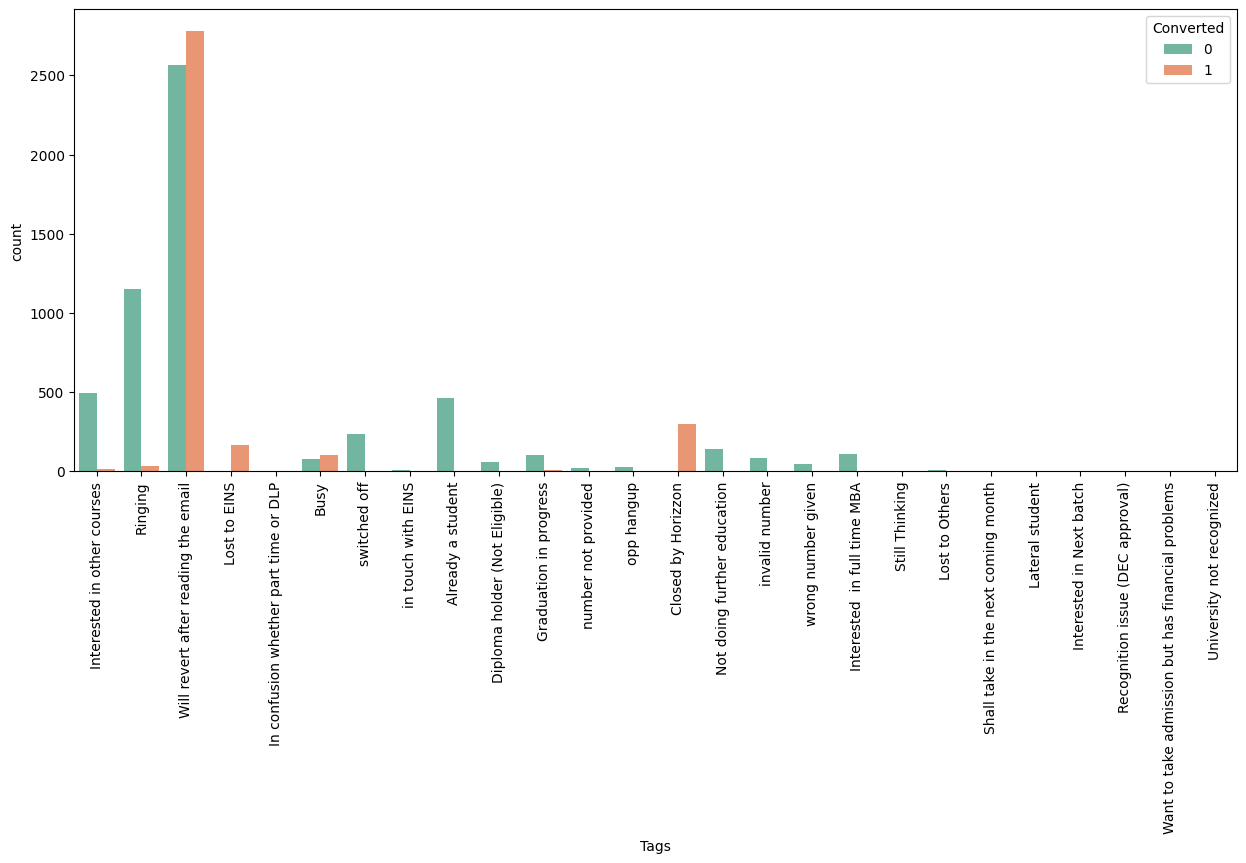

In [ ]:
mpl.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
This is a column which is generated by the sales team for their analysis , so this is not providing useful information for model building. So we can remove this column before building the model.

In [ ]:
leads = leads.drop(['Tags'], axis =1)

### 22) City

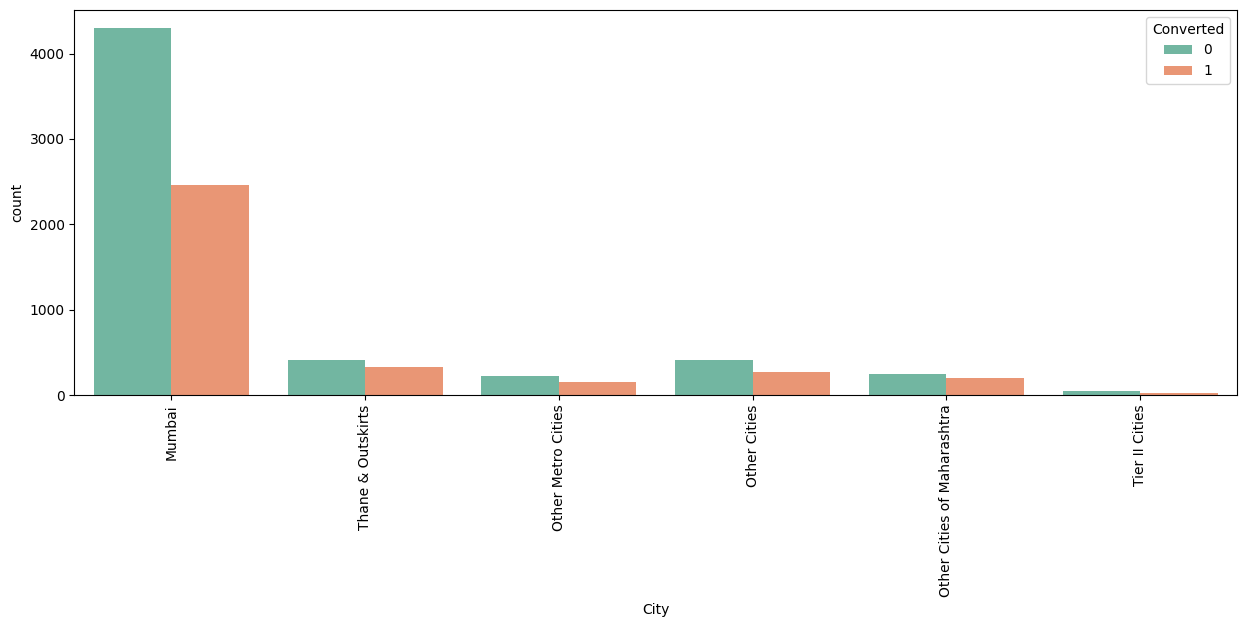

In [ ]:
mpl.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### Inference
**Most leads are from mumbai with around 50% conversion rate.**

### 23) A free copy of Mastering The Interview

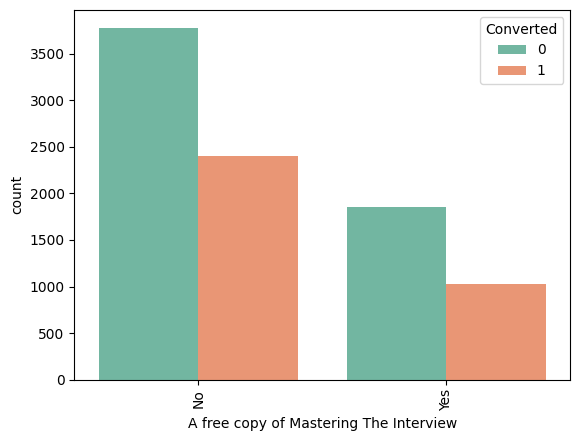

In [ ]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

### 24) Last Notable Activity

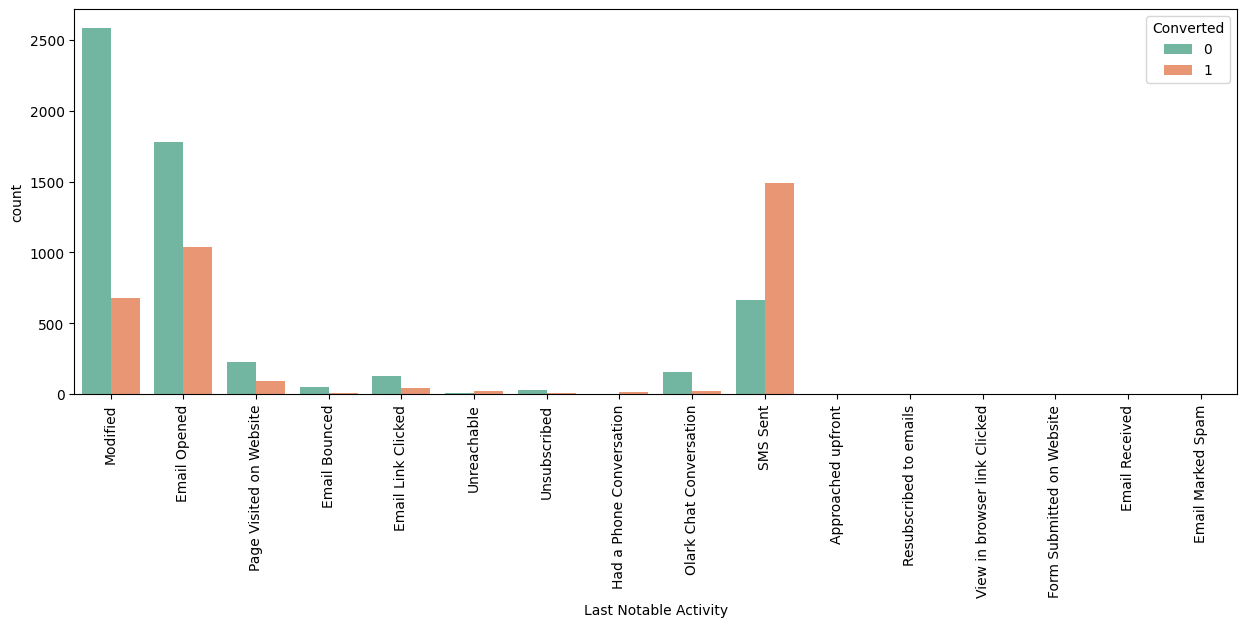

In [ ]:
mpl.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads, palette='Set2')
mpl.xticks(rotation = 90)
mpl.show()

In [ ]:
leads.shape

(9074, 16)

In [ ]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Data Preparation for Modeling

### 1) Converting some binary variables (Yes/No) to 1/0

In [ ]:
vars =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[vars] = leads[vars].apply(binary_map)

### 2) Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [ ]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Concatenating the dummy_data to the leads dataframe
leads = pd.concat([leads, dummy_data], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


**Dropping the columns for which dummies were created**

In [ ]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [ ]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,1,...,0,0,1,0,0,0,0,0,0,0


### 3) Splitting the data into  train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Putting target variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

### 4)  Scaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#standardised scaling the numerical variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8416,585607,1,0,1.020472,-0.321145,2.095230,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8655,583698,0,0,-1.149269,-0.889662,-1.263346,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8087,588005,0,0,-1.149269,-0.889662,-1.263346,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5052,611316,0,0,-1.149269,-0.889662,-1.263346,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8935,581851,0,0,-0.787646,-0.465560,-0.703583,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Checking the Lead Conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% lead conversion rate.

# Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True,  True, False,  True,  True, False,  True,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 43),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Welingak Website', False, 2),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', False, 22),
 ('Last Activi

In [ ]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Number', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

# Model Building

### Assessing the model with StatsModels

### Model-1

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.8
Date:                Sat, 15 Apr 2023   Deviance:                       5245.7
Time:                        16:03:04   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6809      0.999     -3.685      0.000      -5.638      -1.723
Lead Number                                            6.71e-06   1.55e-06      4.329      0.000    3.67e-06    9.75e-06
Do Not Email                                            -0.8411      0.192     -4.386      0.000      -1.217      -0.465
TotalVisits                                              0.1668      0.045      3.685      0.000       0.078       0.256
Total Time Spent on Website                              1.0315      0.040     26.072      0.000       0.954       1.109
A free copy of Mastering The Interview                  -0.1957      0.087     -2.243      0.025      -0.367      -0.025
Lead Origin_Landing Page Submission                     -1.0686      0.130     -8.194      0.000      -1.324      -0.813
Lead Origin_Lead Add Form                                5.8615      0.731      8.023      0.000       4.430       7.293
Lead Source_Olark Chat                                   1.1954      0.136      8.809      0.000       0.929       1.461
Lead Source_Reference                                   -2.6587      0.756     -3.517      0.000      -4.140      -1.177
Last Activity_Email Bounced                             -0.8892      0.418     -2.126      0.033      -1.709      -0.070
Last Activity_Email Opened                               0.5567      0.178      3.120      0.002       0.207       0.906
Last Activity_Olark Chat Conversation                   -1.1248      0.203     -5.529      0.000      -1.523      -0.726
Last Activity_Page Visited on Website                   -0.2536      0.184     -1.379      0.168      -0.614       0.107
Last Activity_SMS Sent                                   0.8449      0.179      4.720      0.000       0.494       1.196
Specialization_Others                                   -1.1583      0.127     -9.154      0.000      -1.406      -0.910
What is your current occupation_Unemployed              -0.7033      0.210     -3.352      0.001      -1.115      -0.292
What is your current occupation_Working Professional     2.0708      0.290      7.142      0.000       1.503       2.639
Last Notable Activity_Email Opened                      -0.5367      0.211     -2.540      0.011      -0.951      -0.122
Last Notable Activity_Modified                          -0.6916      0.159     -4.353      0.000      -1.003      -0.380
Last Notable Activity_SMS Sent                           0.6507      0.215      3.027      0.002       0.229       1.072
========================================================================================================================
"""

Since p-value of 'Last Activity_Page Visited on Website' is very high, we can drop this column.

In [ ]:
# Dropping the column 'Last Activity_Page Visited on Website'
col1 = cols.drop('Last Activity_Page Visited on Website')

### Model-2

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.8
Date:                Sat, 15 Apr 2023   Deviance:                       5247.6
Time:                        16:04:03   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3945
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8222      0.994     -3.845      0.000      -5.770      -1.874
Lead Number                                           6.742e-06   1.55e-06      4.348      0.000     3.7e-06    9.78e-06
Do Not Email                                            -0.8512      0.191     -4.457      0.000      -1.225      -0.477
TotalVisits                                              0.1560      0.045      3.499      0.000       0.069       0.243
Total Time Spent on Website                              1.0303      0.040     26.068      0.000       0.953       1.108
A free copy of Mastering The Interview                  -0.1943      0.087     -2.228      0.026      -0.365      -0.023
Lead Origin_Landing Page Submission                     -1.0710      0.131     -8.206      0.000      -1.327      -0.815
Lead Origin_Lead Add Form                                5.8537      0.731      8.010      0.000       4.421       7.286
Lead Source_Olark Chat                                   1.1869      0.136      8.754      0.000       0.921       1.453
Lead Source_Reference                                   -2.6601      0.756     -3.517      0.000      -4.142      -1.178
Last Activity_Email Bounced                             -0.7838      0.411     -1.908      0.056      -1.589       0.021
Last Activity_Email Opened                               0.6401      0.169      3.794      0.000       0.309       0.971
Last Activity_Olark Chat Conversation                   -1.0301      0.192     -5.360      0.000      -1.407      -0.653
Last Activity_SMS Sent                                   0.9293      0.169      5.497      0.000       0.598       1.261
Specialization_Others                                   -1.1646      0.127     -9.201      0.000      -1.413      -0.917
What is your current occupation_Unemployed              -0.6964      0.210     -3.324      0.001      -1.107      -0.286
What is your current occupation_Working Professional     2.0803      0.290      7.179      0.000       1.512       2.648
Last Notable Activity_Email Opened                      -0.4987      0.210     -2.380      0.017      -0.909      -0.088
Last Notable Activity_Modified                          -0.6552      0.157     -4.183      0.000      -0.962      -0.348
Last Notable Activity_SMS Sent                           0.6875      0.213      3.224      0.001       0.270       1.105
========================================================================================================================
"""

Since p-value of 'Last Activity_Email Bounced' is very high (>0.05), we can drop this column.

In [ ]:
col1 = col1.drop('Last Activity_Email Bounced')

### Model-3

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.8
Date:                Sat, 15 Apr 2023   Deviance:                       5251.7
Time:                        16:05:26   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3941
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8324      0.994     -3.857      0.000      -5.780      -1.885
Lead Number                                            6.72e-06   1.55e-06      4.336      0.000    3.68e-06    9.76e-06
Do Not Email                                            -1.0285      0.172     -5.983      0.000      -1.365      -0.692
TotalVisits                                              0.1606      0.045      3.606      0.000       0.073       0.248
Total Time Spent on Website                              1.0291      0.039     26.055      0.000       0.952       1.107
A free copy of Mastering The Interview                  -0.1925      0.087     -2.208      0.027      -0.363      -0.022
Lead Origin_Landing Page Submission                     -1.0767      0.130     -8.257      0.000      -1.332      -0.821
Lead Origin_Lead Add Form                                5.8368      0.729      8.008      0.000       4.408       7.265
Lead Source_Olark Chat                                   1.1862      0.136      8.749      0.000       0.920       1.452
Lead Source_Reference                                   -2.6300      0.754     -3.487      0.000      -4.109      -1.152
Last Activity_Email Opened                               0.6758      0.168      4.023      0.000       0.347       1.005
Last Activity_Olark Chat Conversation                   -0.9945      0.192     -5.190      0.000      -1.370      -0.619
Last Activity_SMS Sent                                   0.9762      0.168      5.819      0.000       0.647       1.305
Specialization_Others                                   -1.1682      0.126     -9.236      0.000      -1.416      -0.920
What is your current occupation_Unemployed              -0.6930      0.209     -3.313      0.001      -1.103      -0.283
What is your current occupation_Working Professional     2.0790      0.289      7.189      0.000       1.512       2.646
Last Notable Activity_Email Opened                      -0.5103      0.209     -2.442      0.015      -0.920      -0.101
Last Notable Activity_Modified                          -0.6660      0.156     -4.271      0.000      -0.972      -0.360
Last Notable Activity_SMS Sent                           0.6759      0.213      3.175      0.001       0.259       1.093
========================================================================================================================
"""

### Checking for VIF values:

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,57.82
13,What is your current occupation_Unemployed,34.09
15,Last Notable Activity_Email Opened,10.73
9,Last Activity_Email Opened,8.64
17,Last Notable Activity_SMS Sent,8.43
5,Lead Origin_Landing Page Submission,7.78
11,Last Activity_SMS Sent,6.80
16,Last Notable Activity_Modified,5.79
12,Specialization_Others,4.81
6,Lead Origin_Lead Add Form,4.52


In [ ]:
# Dropping the column  'Lead Number' because it has very high VIF
col1 = col1.drop('Lead Number')

### Model-4

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.3
Date:                Sat, 15 Apr 2023   Deviance:                       5270.6
Time:                        16:07:14   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3923
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3186      0.266      1.197      0.231      -0.203       0.840
Do Not Email                                            -1.0759      0.171     -6.277      0.000      -1.412      -0.740
TotalVisits                                              0.1680      0.045      3.774      0.000       0.081       0.255
Total Time Spent on Website                              1.0293      0.039     26.093      0.000       0.952       1.107
A free copy of Mastering The Interview                  -0.2219      0.087     -2.558      0.011      -0.392      -0.052
Lead Origin_Landing Page Submission                     -1.0979      0.130     -8.414      0.000      -1.354      -0.842
Lead Origin_Lead Add Form                                5.8311      0.729      7.996      0.000       4.402       7.260
Lead Source_Olark Chat                                   1.1291      0.134      8.395      0.000       0.865       1.393
Lead Source_Reference                                   -2.6268      0.754     -3.482      0.000      -4.105      -1.148
Last Activity_Email Opened                               0.6677      0.168      3.973      0.000       0.338       0.997
Last Activity_Olark Chat Conversation                   -1.0076      0.191     -5.271      0.000      -1.382      -0.633
Last Activity_SMS Sent                                   0.9505      0.167      5.687      0.000       0.623       1.278
Specialization_Others                                   -1.1636      0.127     -9.198      0.000      -1.412      -0.916
What is your current occupation_Unemployed              -0.6433      0.207     -3.103      0.002      -1.050      -0.237
What is your current occupation_Working Professional     2.0983      0.288      7.297      0.000       1.535       2.662
Last Notable Activity_Email Opened                      -0.5030      0.209     -2.408      0.016      -0.912      -0.094
Last Notable Activity_Modified                          -0.6462      0.156     -4.154      0.000      -0.951      -0.341
Last Notable Activity_SMS Sent                           0.6269      0.212      2.958      0.003       0.211       1.042
========================================================================================================================
"""

### Checking for VIF values:

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,14.21
14,Last Notable Activity_Email Opened,10.16
8,Last Activity_Email Opened,8.62
16,Last Notable Activity_SMS Sent,8.05
10,Last Activity_SMS Sent,6.80
4,Lead Origin_Landing Page Submission,6.68
15,Last Notable Activity_Modified,5.12
5,Lead Origin_Lead Add Form,4.49
11,Specialization_Others,4.19
7,Lead Source_Reference,4.16


In [ ]:
# Dropping the column 'What is your current occupation_Unemployed' due to high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

### Model-5

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.0
Date:                Sat, 15 Apr 2023   Deviance:                       5280.0
Time:                        16:08:13   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3914
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3001      0.175     -1.717      0.086      -0.643       0.042
Do Not Email                                            -1.0791      0.172     -6.290      0.000      -1.415      -0.743
TotalVisits                                              0.1680      0.044      3.778      0.000       0.081       0.255
Total Time Spent on Website                              1.0309      0.039     26.145      0.000       0.954       1.108
A free copy of Mastering The Interview                  -0.2237      0.087     -2.581      0.010      -0.394      -0.054
Lead Origin_Landing Page Submission                     -1.0951      0.130     -8.392      0.000      -1.351      -0.839
Lead Origin_Lead Add Form                                5.8229      0.729      7.985      0.000       4.394       7.252
Lead Source_Olark Chat                                   1.1344      0.134      8.441      0.000       0.871       1.398
Lead Source_Reference                                   -2.5999      0.754     -3.447      0.001      -4.078      -1.122
Last Activity_Email Opened                               0.6742      0.168      4.011      0.000       0.345       1.004
Last Activity_Olark Chat Conversation                   -0.9865      0.191     -5.174      0.000      -1.360      -0.613
Last Activity_SMS Sent                                   0.9397      0.167      5.624      0.000       0.612       1.267
Specialization_Others                                   -1.1715      0.127     -9.253      0.000      -1.420      -0.923
What is your current occupation_Working Professional     2.7204      0.207     13.173      0.000       2.316       3.125
Last Notable Activity_Email Opened                      -0.5095      0.209     -2.442      0.015      -0.918      -0.100
Last Notable Activity_Modified                          -0.6561      0.155     -4.224      0.000      -0.961      -0.352
Last Notable Activity_SMS Sent                           0.6228      0.212      2.941      0.003       0.208       1.038
========================================================================================================================
"""

### Checking for VIF values:

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,9.24
8,Last Activity_Email Opened,8.60
15,Last Notable Activity_SMS Sent,7.37
10,Last Activity_SMS Sent,6.78
4,Lead Origin_Landing Page Submission,5.08
5,Lead Origin_Lead Add Form,4.42
7,Lead Source_Reference,4.14
14,Last Notable Activity_Modified,4.04
11,Specialization_Others,3.21
6,Lead Source_Olark Chat,2.55


In [ ]:
# Dropping the column  'Last Notable Activity_Email Opened' due to high VIF
col1 = col1.drop('Last Notable Activity_Email Opened')

### Model-6

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.9
Date:                Sat, 15 Apr 2023   Deviance:                       5285.9
Time:                        16:09:01   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4783      0.160     -2.989      0.003      -0.792      -0.165
Do Not Email                                            -1.0681      0.171     -6.243      0.000      -1.403      -0.733
TotalVisits                                              0.1810      0.044      4.099      0.000       0.094       0.268
Total Time Spent on Website                              1.0326      0.039     26.218      0.000       0.955       1.110
A free copy of Mastering The Interview                  -0.2238      0.087     -2.584      0.010      -0.394      -0.054
Lead Origin_Landing Page Submission                     -1.0914      0.130     -8.375      0.000      -1.347      -0.836
Lead Origin_Lead Add Form                                5.8593      0.730      8.027      0.000       4.429       7.290
Lead Source_Olark Chat                                   1.1625      0.134      8.675      0.000       0.900       1.425
Lead Source_Reference                                   -2.5973      0.755     -3.440      0.001      -4.077      -1.117
Last Activity_Email Opened                               0.3651      0.111      3.282      0.001       0.147       0.583
Last Activity_Olark Chat Conversation                   -1.0297      0.189     -5.442      0.000      -1.401      -0.659
Last Activity_SMS Sent                                   0.8250      0.159      5.183      0.000       0.513       1.137
Specialization_Others                                   -1.1586      0.126     -9.172      0.000      -1.406      -0.911
What is your current occupation_Working Professional     2.7272      0.206     13.211      0.000       2.323       3.132
Last Notable Activity_Modified                          -0.3773      0.106     -3.553      0.000      -0.585      -0.169
Last Notable Activity_SMS Sent                           0.9015      0.179      5.034      0.000       0.550       1.252
========================================================================================================================
"""

### Checking for VIF values:

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_SMS Sent,6.42
14,Last Notable Activity_SMS Sent,6.39
4,Lead Origin_Landing Page Submission,4.58
5,Lead Origin_Lead Add Form,4.42
7,Lead Source_Reference,4.13
11,Specialization_Others,2.99
8,Last Activity_Email Opened,2.66
6,Lead Source_Olark Chat,2.54
13,Last Notable Activity_Modified,2.54
3,A free copy of Mastering The Interview,2.18


In [ ]:
# Dropping the column  'Last Activity_SMS Sent' due to high VIF
col1 = col1.drop('Last Activity_SMS Sent')

### Model 7

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.1
Date:                Sat, 15 Apr 2023   Deviance:                       5312.2
Time:                        16:10:38   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3597      0.157     -2.297      0.022      -0.667      -0.053
Do Not Email                                            -1.1288      0.170     -6.659      0.000      -1.461      -0.797
TotalVisits                                              0.1850      0.044      4.219      0.000       0.099       0.271
Total Time Spent on Website                              1.0345      0.039     26.356      0.000       0.958       1.111
A free copy of Mastering The Interview                  -0.2200      0.086     -2.547      0.011      -0.389      -0.051
Lead Origin_Landing Page Submission                     -1.0785      0.130     -8.315      0.000      -1.333      -0.824
Lead Origin_Lead Add Form                                6.0065      0.731      8.222      0.000       4.575       7.438
Lead Source_Olark Chat                                   1.1824      0.134      8.856      0.000       0.921       1.444
Lead Source_Reference                                   -2.6656      0.756     -3.524      0.000      -4.148      -1.183
Last Activity_Email Opened                               0.2078      0.105      1.981      0.048       0.002       0.413
Last Activity_Olark Chat Conversation                   -1.2647      0.182     -6.935      0.000      -1.622      -0.907
Specialization_Others                                   -1.1526      0.126     -9.161      0.000      -1.399      -0.906
What is your current occupation_Working Professional     2.7095      0.206     13.182      0.000       2.307       3.112
Last Notable Activity_Modified                          -0.2423      0.101     -2.393      0.017      -0.441      -0.044
Last Notable Activity_SMS Sent                           1.5949      0.121     13.210      0.000       1.358       1.831
========================================================================================================================
"""

### Checking for VIF values:

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,4.49
5,Lead Origin_Lead Add Form,4.39
7,Lead Source_Reference,4.13
10,Specialization_Others,2.96
8,Last Activity_Email Opened,2.53
6,Lead Source_Olark Chat,2.52
13,Last Notable Activity_SMS Sent,2.32
12,Last Notable Activity_Modified,2.30
3,A free copy of Mastering The Interview,2.18
9,Last Activity_Olark Chat Conversation,1.70


**Since the Pvalues of all variables is between 0 and 0.05 and VIF values are low for all the variables, model-7 is our final model. We have 14 variables in our final model.**

# Making Prediction on the Train set

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8416    0.050670
8655    0.221826
8087    0.991553
5052    0.532966
8935    0.073928
7141    0.020707
2758    0.048807
1435    0.427465
1066    0.156486
8354    0.384992
dtype: float64

In [ ]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05067012, 0.22182646, 0.99155321, 0.53296627, 0.07392758,
       0.02070721, 0.04880653, 0.4274651 , 0.15648625, 0.3849918 ])

## Creating a dataframe with the actual Converted flag and the predicted probabilities**

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.050670,8416
1,0,0.221826,8655
2,1,0.991553,8087
3,1,0.532966,5052
4,0,0.073928,8935


### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels 

**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.050670,8416,0
1,0,0.221826,8655,0
2,1,0.991553,8087,1
3,1,0.532966,5052,1
4,0,0.073928,8935,0


### Making the Confusion matrix

In [ ]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3482  457]
 [ 747 1665]]


In [ ]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3482      457
# converted            747       1665  

In [ ]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8104235553456148


### Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6902985074626866


In [ ]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.883980705762884


In [ ]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11601929423711602


In [ ]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7846371347785108


In [ ]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8233624970442185


#### We found out that our specificity was good (~88%) but our sensitivity was only 69%. Hence, this needed to be taken care of.
#### We have got sensitivity of 69% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

# Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    mpl.figure(figsize=(5, 5))
    mpl.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    mpl.plot([0, 1], [0, 1], 'k--')
    mpl.xlim([0.0, 1.0])
    mpl.ylim([0.0, 1.05])
    mpl.xlabel('False Positive Rate or [1 - True Negative Rate]')
    mpl.ylabel('True Positive Rate')
    mpl.title('Receiver operating characteristic example')
    mpl.legend(loc="lower right")
    mpl.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

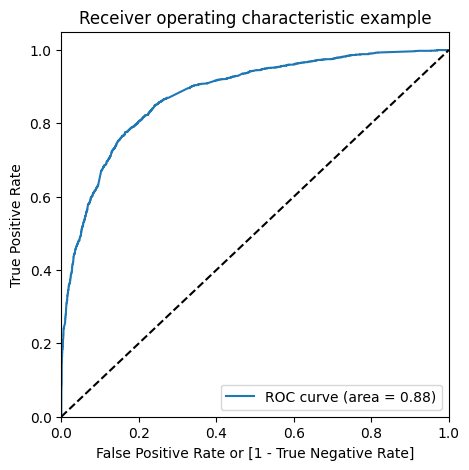

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**Since we have higher (0.88) area under the ROC curve , therefore our model is a good one.**

### Finding Optimal Cutoff Point

**Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.**


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.050670,8416,0,1,0,0,0,0,0,0,0,0,0
1,0,0.221826,8655,0,1,1,1,0,0,0,0,0,0,0
2,1,0.991553,8087,1,1,1,1,1,1,1,1,1,1,1
3,1,0.532966,5052,1,1,1,1,1,1,1,0,0,0,0
4,0,0.073928,8935,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379783  1.000000  0.000000
0.1   0.1  0.587624  0.969320  0.353897
0.2   0.2  0.748071  0.904229  0.652450
0.3   0.3  0.794048  0.834577  0.769231
0.4   0.4  0.810109  0.776949  0.830414
0.5   0.5  0.810424  0.690299  0.883981
0.6   0.6  0.796410  0.582090  0.927647
0.7   0.7  0.778618  0.500415  0.948972
0.8   0.8  0.759408  0.412521  0.971820
0.9   0.9  0.714848  0.266169  0.989591


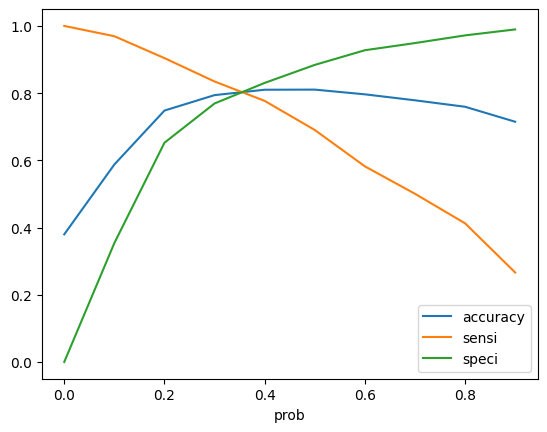

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
mpl.show()

#### From the curve above, approximately 0.35 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.050670,8416,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.221826,8655,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.991553,8087,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.532966,5052,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.073928,8935,0,1,0,0,0,0,0,0,0,0,0,0


### Assigning Lead Score to the Training data


In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.050670,8416,0,1,0,0,0,0,0,0,0,0,0,0,5
1,0,0.221826,8655,0,1,1,1,0,0,0,0,0,0,0,0,22
2,1,0.991553,8087,1,1,1,1,1,1,1,1,1,1,1,1,99
3,1,0.532966,5052,1,1,1,1,1,1,1,0,0,0,0,1,53
4,0,0.073928,8935,0,1,0,0,0,0,0,0,0,0,0,0,7


# Model Evaluation - train data

In [ ]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8020784128483703


In [ ]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3151,  788],
       [ 469, 1943]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8055555555555556


In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7999492256917999


In [ ]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.20005077430820006


In [ ]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7114610032954961


In [ ]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8704419889502762


# Observations:
After running the model on the Train Data , we obtain:

* **Accuracy : 80.2 %**
* **Sensitivity : 80.5 %**
* **Specificity : 80 %**

## Precision and Recall - train data

* **Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.**
* **Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.**

In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3151,  788],
       [ 469, 1943]])

In [ ]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7114610032954961


In [ ]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.8055555555555556


Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))

Precision : 0.7114610032954961


In [ ]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Recall : 0.8055555555555556


### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    1
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       0
        ..
 6346    1
 6347    0
 6348    0
 6349    1
 6350    1
 Name: final_predicted, Length: 6351, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

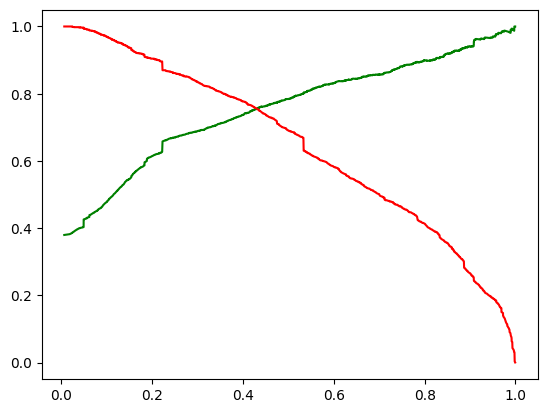

In [ ]:
# plotting a trade-off curve between precision and recall
mpl.plot(thresholds, p[:-1], "g-")
mpl.plot(thresholds, r[:-1], "r-")
mpl.show()

**The above graph shows the trade-off between the Precision and Recall .

## Making predictions on the test set

### Scaling the test data

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [ ]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1554,1,-0.426022,-0.714172,0,0,0,0,0,0,0,0,0,1,0
3056,1,-0.064399,0.845137,0,0,0,0,0,0,0,0,0,0,1
5569,0,-1.149269,-0.889662,0,0,0,1,0,0,1,1,0,1,0
3022,0,-1.149269,-0.889662,0,0,1,0,1,0,0,1,0,0,1
7549,0,-1.149269,-0.889662,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1554    0.072531
3056    0.724860
5569    0.048807
3022    0.908094
7549    0.532966
6293    0.182816
4828    0.351442
5435    0.746557
1241    0.182816
3259    0.221826
dtype: float64

In [ ]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
1554,0.072531
3056,0.724860
5569,0.048807
3022,0.908094
7549,0.532966


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,1554,0,0.072531
1,3056,1,0.724860
2,5569,0,0.048807
3,3022,1,0.908094
4,7549,0,0.532966


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [ ]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,1554,0,0.072531,0
1,3056,1,0.724860,1
2,5569,0,0.048807,0
3,3022,1,0.908094,1
4,7549,0,0.532966,1


In [ ]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8178479618068307


In [ ]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1395,  305],
       [ 191,  832]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8132942326490714


In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8205882352941176


### Assigning Lead Score to the Testing data

In [ ]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,1554,0,0.072531,0,7
1,3056,1,0.724860,1,72
2,5569,0,0.048807,0,5
3,3022,1,0.908094,1,91
4,7549,0,0.532966,1,53


# Observations:
After running the model on the Test Data , we obtain:

* **Accuracy : 81.8 %**
* **Sensitivity : 81.3 %**
* **Specificity : 82 %**

# Results :

### 1) Comparing the values obtained for Train & Test:

#### Train Data: 

* **Accuracy : 80.2 %**
* **Sensitivity : 80.5 %**
* **Specificity : 80 %**

#### Test Data: 

* **Accuracy : 81.8 %**
* **Sensitivity : 81.3 %**
* **Specificity : 82 %**

**Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.**

### 2) Finding out the leads which should be contacted:
#### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [ ]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
3,3022,1,0.908094,1,91
10,6892,1,0.983190,1,98
14,1982,1,0.914265,1,91
16,2926,1,0.895721,1,90
26,8112,1,0.997877,1,100
...,...,...,...,...,...
2684,5376,1,0.861855,1,86
2687,2854,1,0.976202,1,98
2703,8888,1,0.985764,1,99
2716,6743,1,0.886435,1,89


**So there are 378 leads which can be contacted and have a high chance of getting converted.  The Prospect ID of the customers to be contacted are :**

In [ ]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([3022, 6892, 1982, 2926, 8112, 4662, 8243, 2629, 6684, 3477,  884,
       8475, 2458, 4310,  824, 2221, 6375, 2631, 5206, 5647, 1767, 3015,
       7082, 2161,  161, 2984, 2946, 3475, 4732, 2397,  174, 5502, 1110,
       2018,  270, 4149, 4963, 2791, 2132, 8325, 5706, 3758, 1730, 6995,
       1234, 3207, 4112, 5007, 8474, 2486, 2069, 7356, 5784, 2675, 5979,
       2542, 4959, 1683, 6180, 8098, 6699, 8086,  447, 7840, 3463, 3817,
       3822, 7212, 7450, 2688, 8581, 3519, 2483, 4743, 7467, 3355, 7129,
       1950, 1283, 7128, 4068, 5167, 4048, 6638, 4984, 2266, 6529, 3285,
       4573, 8495, 8959, 7420, 3403, 4233, 2598, 4957, 5364, 5022,  818,
       4213, 1927,   91, 4592, 2748, 7905, 5808, 6645, 7482, 2493, 7489,
        319, 5395, 6540, 5741, 7174, 4241, 1561, 4909, 4832, 5822, 1663,
       7970, 2559, 7817,  262, 6538, 7606, 2837, 2713, 6879, 1867, 2914,
       1570, 3521, 5641, 7915, 2594, 5292, 6741, 5586, 3601, 5812, 5803,
       3937, 1398, 9034,  819, 4561, 5671, 4223, 56

### 3) Finding out the Important Features  from our final model:

In [ ]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               6.006522
What is your current occupation_Working Professional    2.709450
Last Notable Activity_SMS Sent                          1.594866
Lead Source_Olark Chat                                  1.182410
Total Time Spent on Website                             1.034458
Last Activity_Email Opened                              0.207756
TotalVisits                                             0.185027
A free copy of Mastering The Interview                 -0.219989
Last Notable Activity_Modified                         -0.242330
const                                                  -0.359688
Lead Origin_Landing Page Submission                    -1.078522
Do Not Email                                           -1.128825
Specialization_Others                                  -1.152567
Last Activity_Olark Chat Conversation                  -1.264714
Lead Source_Reference                                  -2.665589
dtype: float64

# Recommendations:

* The company **should make calls** to the leads coming from the `lead sources "Olark Chat"` as these are more likely to get converted.
* The company **should make calls** to the leads coming from the `lead origin lead_add_form"`.
* The company **should make calls** to the leads who are the `"working professionals"` as they are more likely to get converted.
* The company **should make calls** to the leads who spent `"more time on the websites"` as these are more likely to get converted.
* The company **should make calls** to the leads whose `last activity` was `SMS Sent` and `Email opened` as they are more likely to get converted.

* The company **should not make calls** to the leads whose `last activity` was `"Olark Chat Conversation"` as they are not likely to get converted.
* The company **should not make calls** to the leads whose `lead origin` is `"Landing Page Submission"` as they are not likely to get converted.
* The company **should not make calls** to the leads whose `Specialization` was `"Others"` as they are not likely to get converted.
* The company **should not make calls** to the leads coming from lead source `Reference` as they are not likely to get converted.